# Data Analytics : Assignement 3. 



### Question 1: Download the [Kaggle Dataset](https://www.kaggle.com/c/house-prices-advanced-regression-techniques#evaluation)

### Answer:

Read the train.csv file into a pandas dataframe. 



In [85]:
import pandas as pd
import numpy as np

train = pd.read_csv("train.csv")


### Question 2 : Parse the data to automatically extract the following attributes : MSZoning, LotFrontage, LotArea, Alley, OverallQual, YearBuilt, RoofStyle, Exterior1st, ExterCond, CentralAir, HalfBath

In [86]:
selected_attributes = [ "MSZoning", "LotFrontage", "LotArea", 
                       "Alley", "OverallQual", "YearBuilt", "RoofStyle", "Exterior1st",
                       "ExterCond", "CentralAir", "HalfBath"]
train[selected_attributes].head()

,MSZoning,LotFrontage,LotArea,Alley,OverallQual,YearBuilt,RoofStyle,Exterior1st,ExterCond,CentralAir,HalfBath
0,RL,65.0,8450,NaN,7,2003,Gable,VinylSd,TA,Y,1
1,RL,80.0,9600,NaN,6,1976,Gable,MetalSd,TA,Y,0
2,RL,68.0,11250,NaN,7,2001,Gable,VinylSd,TA,Y,1
3,RL,60.0,9550,NaN,7,1915,Gable,Wd Sdng,TA,Y,0
4,RL,84.0,14260,NaN,8,2000,Gable,VinylSd,TA,Y,1


In [87]:
train[selected_attributes].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 11 columns):
MSZoning       1460 non-null object
LotFrontage    1201 non-null float64
LotArea        1460 non-null int64
Alley          91 non-null object
OverallQual    1460 non-null int64
YearBuilt      1460 non-null int64
RoofStyle      1460 non-null object
Exterior1st    1460 non-null object
ExterCond      1460 non-null object
CentralAir     1460 non-null object
HalfBath       1460 non-null int64
dtypes: float64(1), int64(4), object(6)
memory usage: 125.5+ KB


#### General information about the selected attributes : 
The 11 selected attributes describe quantitative and qualitative information that a typical home buyer would like to know when considering a potential home purchase. 


When was the house built ? 
How big is the lot ? 
How big is the area in front of the house ? 
Is the house in good condition ? 
What style is the roof ? 
Does it have central air conditionining ? 

#### Attribute  Types: 

Categorical: Alley, MSZoning,Exterior1st, 

Numerical Discrete : LotFrontage , LotArea

Numerical Continuous : 

Ordinal : OverallQual , HalfBath , ExterCond

#### Attribute Data Types: 

The .info() method allows us to see that the "Alley" and "LotFrontage" columns may suffer from missing values.This issue will be addressed before implementing the visual encoding for each attribute.






In [88]:
train[selected_attributes].describe()

,LotFrontage,LotArea,OverallQual,YearBuilt,HalfBath
count,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,70.049958,10516.828082,6.099315,1971.267808,0.382877
std,24.284752,9981.264932,1.382997,30.202904,0.502885
min,21.000000,1300.000000,1.000000,1872.000000,0.000000
25%,59.000000,7553.500000,5.000000,1954.000000,0.000000
50%,69.000000,9478.500000,6.000000,1973.000000,0.000000
75%,80.000000,11601.500000,7.000000,2000.000000,1.000000
max,313.000000,215245.000000,10.000000,2010.000000,2.000000


### Question 3 and 4 : Map and implement each attribute to a visual encoding . 

#### Answer: 
1. Import the data visualization library namely matplotlib and seaborn. 
2. Check for missing values in the "Alley"  and "MSZoning" column. 

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline




# 1. LotFrontage:  Linear feet of street connected to property

### How to interpret this attribute ? 

Lot Frontage determines how much noice and pollution might travel to the residence from the street. 
Upscale neighborhoods have considerably high values of this attribute. 

### How to solve the missing values issue : 

We have 259 missing values. The mean value in this column is 69 and the median value is 70. Hence we can infer that there are no large outliers in this column. For this reason, we made the decision to fill the missing values with the median.



In [90]:
train.LotFrontage.isnull().sum()

259

In [91]:
train.LotFrontage.median()

69.0

In [92]:
lot_mean = train.LotFrontage.mean()
train.LotFrontage = train.LotFrontage.fillna(lot_mean)


In [107]:
train.LotFrontage.head()

0    65.0
1    80.0
2    68.0
3    60.0
4    84.0
Name: LotFrontage, dtype: float64

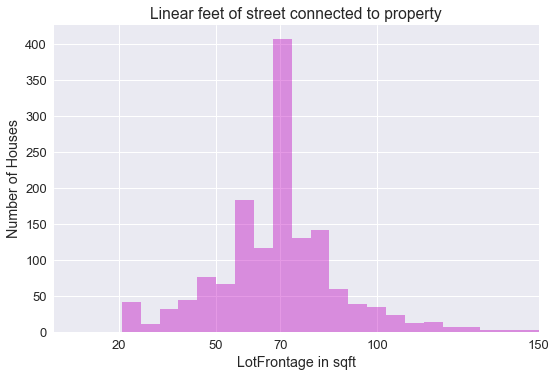

In [120]:
ticks = [20,50,70,100,150,200]
sns.set(font_scale = 1.3)
ax = sns.distplot(train.LotFrontage , kde = False ,color="m")
_ = ax.set_title('Linear feet of street connected to property')
_ = ax.set_xticks(ticks)
_ = ax.set_xlim(0,150)
_= ax.set(xlabel='LotFrontage in sqft', ylabel='Number of Houses')

plt.tight_layout()


# 2.LotArea : Lot size in square feet 

The lot area is one of the most important house property feature checked by usual home owners. Its unit measure is square feet. 

In [111]:
train.LotArea.mode()

0    7200
dtype: int64

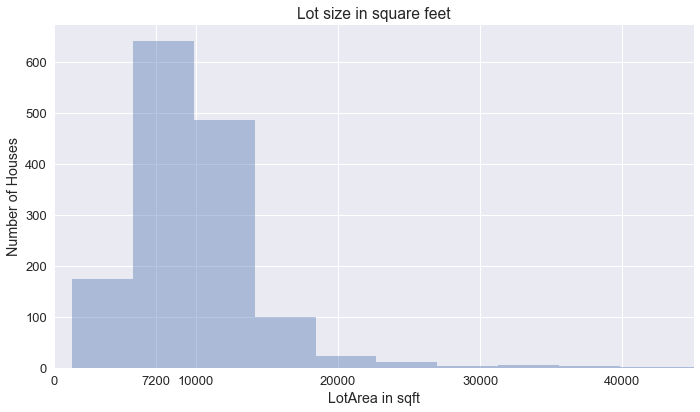

In [122]:
sns.set(font_scale=1.3)
ax = plt.subplots(figsize=(10, 6))
ax = sns.distplot(train.LotArea, kde = False)
_ = ax.set_title('Lot size in square feet')
_ = ax.set_xlim(0,45000)
_= ax.set(xlabel='LotArea in sqft', ylabel='Number of Houses')
_= ax.set_xticks([0,7200,10000,20000,30000,40000])

plt.tight_layout()


# 3.MSZoning =  Identifies the general zoning classification of the sale.

MS Zoning describe the classification of the Residential District. 

A  = Agriculture

C  = Commercial

FV = Floating Village Residential 

I  = Industrial 

RH = Residential High Density

RL = Residential Low Density, which means that this is an upscle neighbourhood

RP = Residential Low Density Park 

RM = Residential Medium Density  

      


In [11]:
rl_perc = train["MSZoning"] == "RL"
len(train[rl_perc])/len(train)

0.7883561643835616

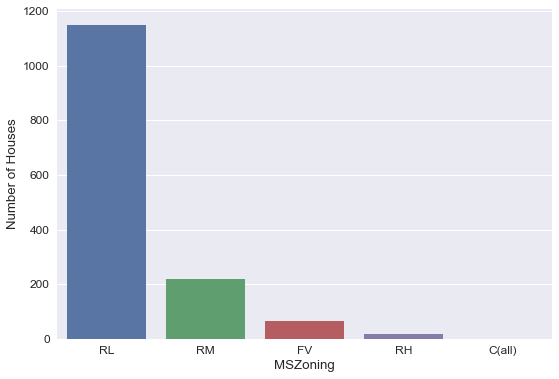

In [12]:
labels = ["RL","RM", "FV", "RH","C(all)"]
ax= sns.countplot(x="MSZoning", data=train , order = labels )
_= ax.set(xlabel='MSZoning', ylabel='Number of Houses')

plt.tight_layout()

# 4.Alley

This attribute refers to the type of alley access. When searching for NaN values, we found that 94 % of the observations were missing. However, when reading the dataset's description we found that NA means No ALley Access. Hence, we replaced the NA value by the string "No Alley Access". 

In [13]:
train.Alley.isnull().sum()/len(train)


0.93767123287671228

In [14]:
train.Alley.value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [124]:
train.Alley = train.Alley.fillna("No alley access")


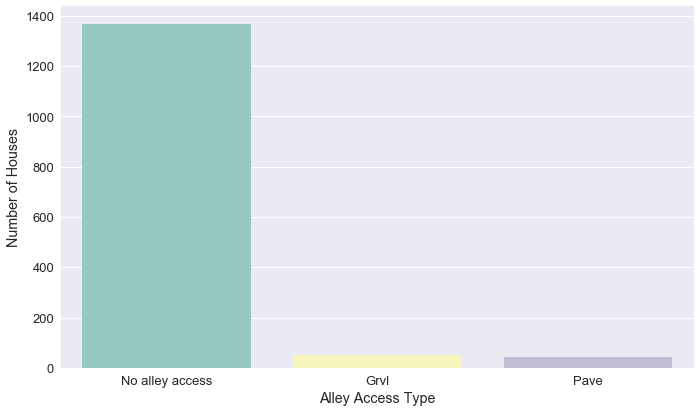

In [131]:
sns.set(font_scale=1.3)
ax = plt.subplots(figsize=(10, 6))
ax = sns.countplot(x="Alley", data=train, palette="Set3")
_ = ax.set_ylabel("Number of houses")
_= ax.set(xlabel='Alley Access Type', ylabel='Number of Houses')
ax = sns.set_style("ticks")
plt.tight_layout()


# 5.OverallQual: Rates the overall material and finish of the house

This attribute rates the overall material and finish of the house. It helps determine the maintenance costs that may be incurred by the home resident. This attribute is ordinal. A score of 10 describes a home in very excellent conditions and a score of 0 describes a house in very poor conditions. 
     

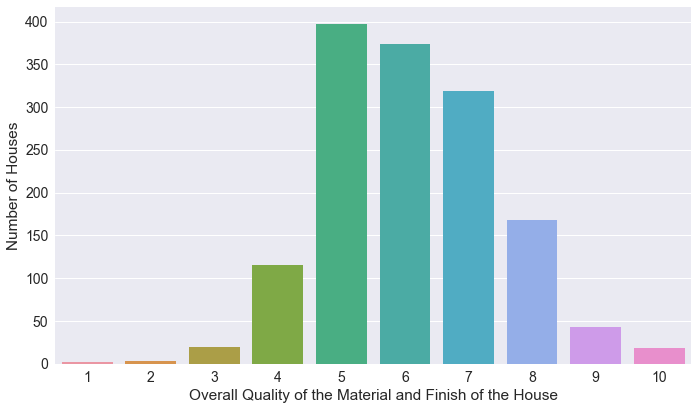

In [134]:
sns.set(font_scale = 1.4)
ax = plt.subplots(figsize=(10, 6))
ax = sns.countplot(x="OverallQual", data=train)
_ = ax.set_ylabel("Number of houses")
_= ax.set(xlabel='Overall Quality of the Material and Finish of the House', ylabel='Number of Houses')
plt.tight_layout()

# 6. YearBuilt: Original construction date
This attribute describes when the house was originally built ? It has a significant influence on the house price. Since an old house would infer higher maintenance costs, unless the property holds significant influence. 


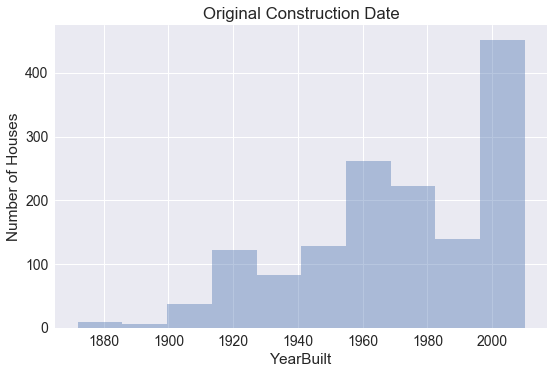

In [136]:
sns.set(font_scale = 1.4)
fig = sns.distplot(train["YearBuilt"], kde=False, bins=10)
_ = fig.set_title('Original Construction Date')
_ = fig.set_ylabel('Number of Houses')
_= ax.set(xlabel='Year Built', ylabel='Number of Houses')
plt.tight_layout()




# 7. RoofStyle: 

RoofStyle describes the house's roof type. Since Gable and Hip are the most frequent roof types in our dataset, we decided to include an image showasing these roof types. 

     

In [139]:
train["RoofStyle"].value_counts()

Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64

<img src="Hip-Roof-vs-Gable-Roof.jpg">

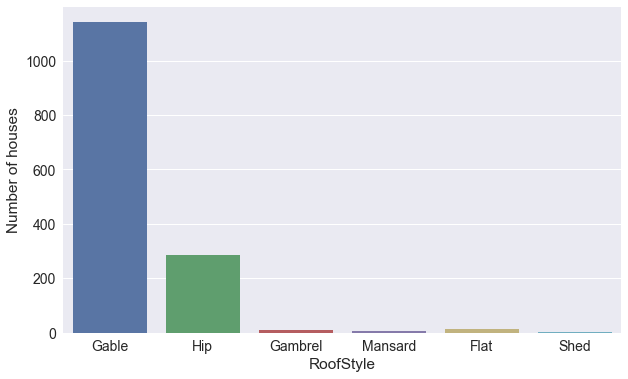

In [138]:
sns.set(font_scale = 1.4)
ax = plt.subplots(figsize=(10, 6))
ax = sns.countplot(x="RoofStyle", data=train)
_ = ax.set_ylabel("Number of houses")






# 8.Exterior1st: Exterior covering on house

This feature describes the exterior covering on the house. It is known as the [outer skin of the house](http://www.hgtv.com/remodel/outdoors/outfit-your-homes-exterior). Below is the explanation of each attribute. 

AsbShng = Asbestos Shingles

AsphShn	= Asphalt Shingles

BrkComm = Brick Common

BrkFace = Brick Face

CBlock  = Cinder Block

CemntBd	= Cement Board

HdBoard	= Hard Board

ImStucc	= Imitation Stucco

MetalSd	= Metal Siding

Other	= Other

Plywood	= Plywood

PreCast	= PreCast	

Stone	= Stone

Stucco	= Stucco

VinylSd	= Vinyl Siding

Wd Sdng	= Wood Siding

WdShing	= Wood Shingles
	

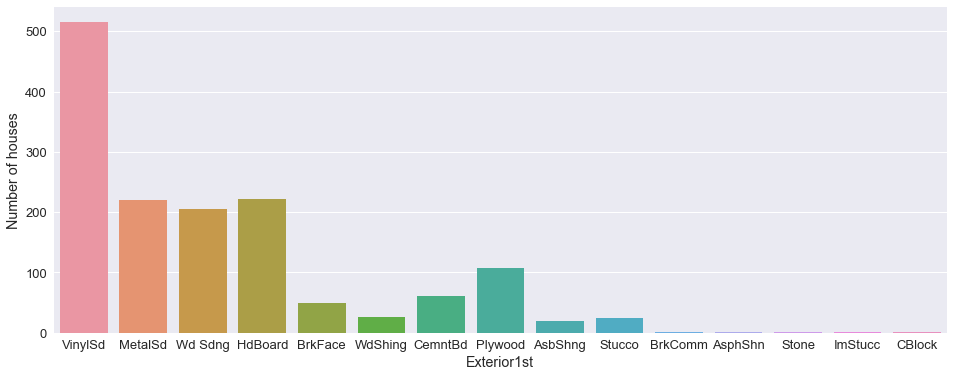

In [242]:
sns.set(font_scale = 1.3)
ax = plt.subplots(figsize=(16, 6))
ax = sns.countplot(x="Exterior1st", data=train)
_ = ax.set_ylabel("Number of houses")
_ = ax.set_xlabel("Exterior1st")





# 9.ExterCond: 

The following variable describes the present condition of the material on the exterior. It is ordinal
and the below values describe each of these conditions. Most of the houses in our dataset have an average exterior condition. 

Ex = Excellent

Gd = Good 

TA = Average/Typical

Fa = Fair

Po = Poor 


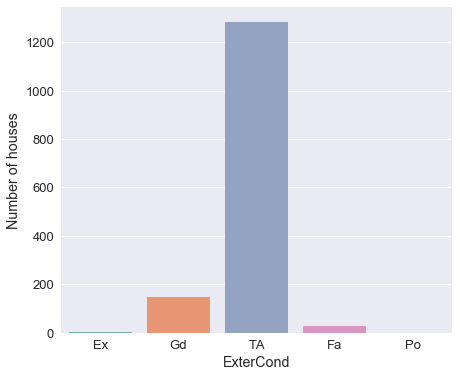

In [161]:
sns.set(font_scale = 1.3)
labels = ["Ex","Gd","TA","Fa","Po"]
ax = plt.subplots(figsize=(7, 6))
ax = sns.countplot(x="ExterCond", data=train , palette ="Set2", order = labels)
_ = ax.set_ylabel("Number of houses")

		
# 10.CentralAir: 

This attribute describes whether a house has Central air conditioning or not. This feature is very relevant in places with terrible heat and humidity. 



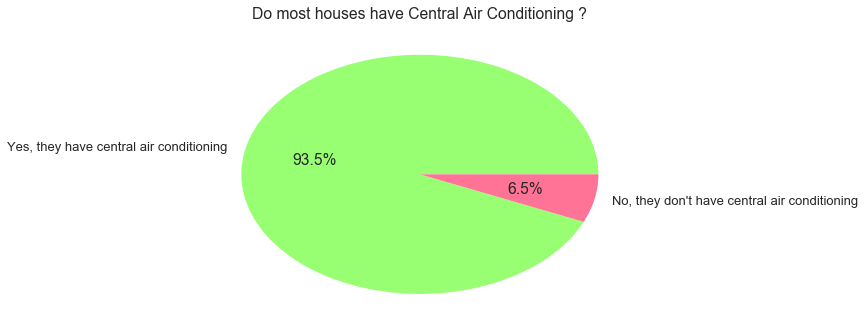

In [209]:
sns.set(font_scale =1.3)
y = train.CentralAir[train.CentralAir =="Y"].count()
n  = train.CentralAir[train.CentralAir =="N"].count()
slices =[y,n]
labels = ["Yes, they have central air conditioning","No, they don't have central air conditioning"]
plt.pie(slices,labels=labels, autopct='%1.1f%%',colors=["#98ff73","#ff7396"])
plt.title("Do most houses have Central Air Conditioning ?")


# 11.HalfBath: Half baths above grade


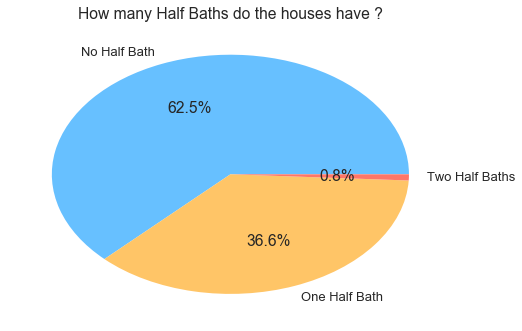

In [217]:
sns.set(font_scale =1.3)
zero = train.HalfBath[train.HalfBath ==0].count()
one = train.HalfBath[train.HalfBath ==1].count()
two = train.HalfBath[train.HalfBath ==2].count()
slices = [zero,one,two]
labels1 = ["No Half Bath","One Half Bath","Two Half Baths"]
plt.pie(slices,labels=labels1, autopct='%1.1f%%',colors=["#67c0ff","#ffc567","#ff7667"])
plt.title("How many Half Baths do the houses have ?")


## Question 5 : Develop strategies to visually encode combinations of attributes and implement where feasible.

In developing combinations of visual encoding we will first construct a heatmap that will show us the correlation between each attribute and the saleprice. We will consider MSZOning, YearBuilt, OverQual and Lot ARea as the most important factors in deciding on the price. To do this we will start by analyzing the SalePrice feature individually then plot it in various ways with the above mentioned attributes. 



In [258]:
train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

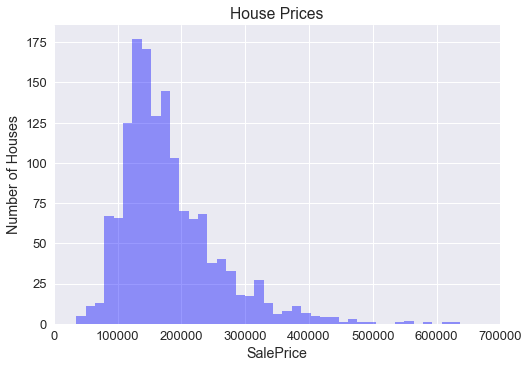

In [283]:
ax = sns.distplot(train.SalePrice  ,color="b", kde=False)
_ = ax.set_title('House Prices')
#_ = ax.set_xticks(ticks)
_ = ax.set_xlim(0,700000)

_= ax.set(xlabel='SalePrice', ylabel='Number of Houses')


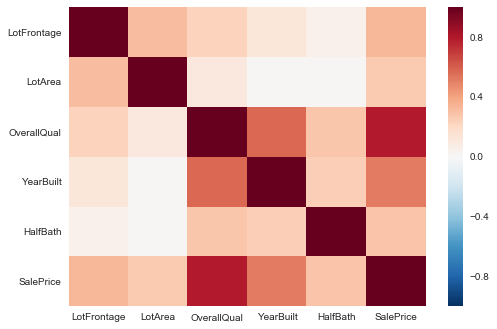

In [306]:
selected_attributes2 = ["MSZoning", "LotFrontage", "LotArea", 
                       "Alley", "OverallQual", "YearBuilt", "RoofStyle", "Exterior1st",
                       "ExterCond", "CentralAir", "HalfBath","SalePrice"]
correlation = train[selected_attributes2].corr()
ax = sns.heatmap(correlation, center=0)

#  Plot the pairwise relationship between the Sale price and OverallCondition

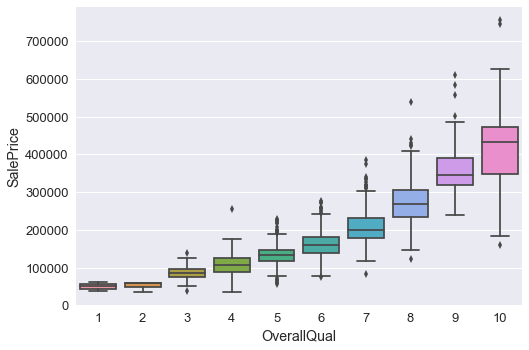

In [287]:
sns.boxplot(x="OverallQual", y="SalePrice", data=train)

# Plot the relationship between SalePrice and LotArea

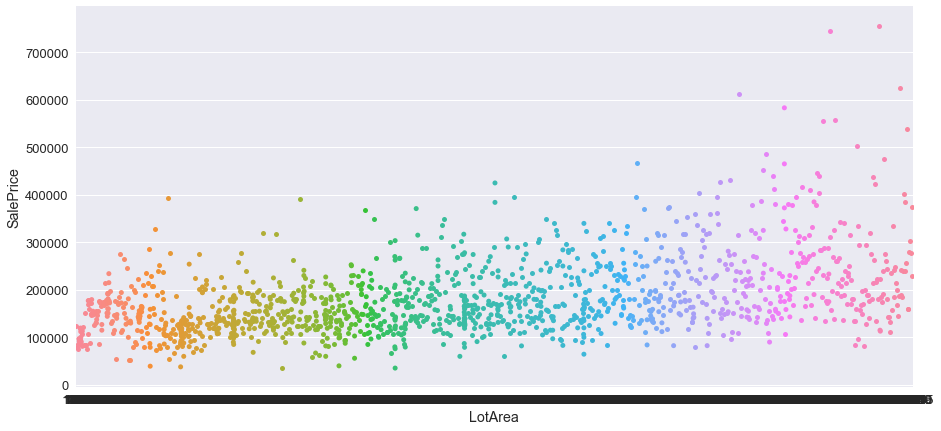

In [286]:
ax = plt.subplots(figsize=(15, 7))

ax = sns.swarmplot(x="LotArea", y="SalePrice", data=train)

# Plot the relationship between Overall Quality, the Year Built  and HalfBath

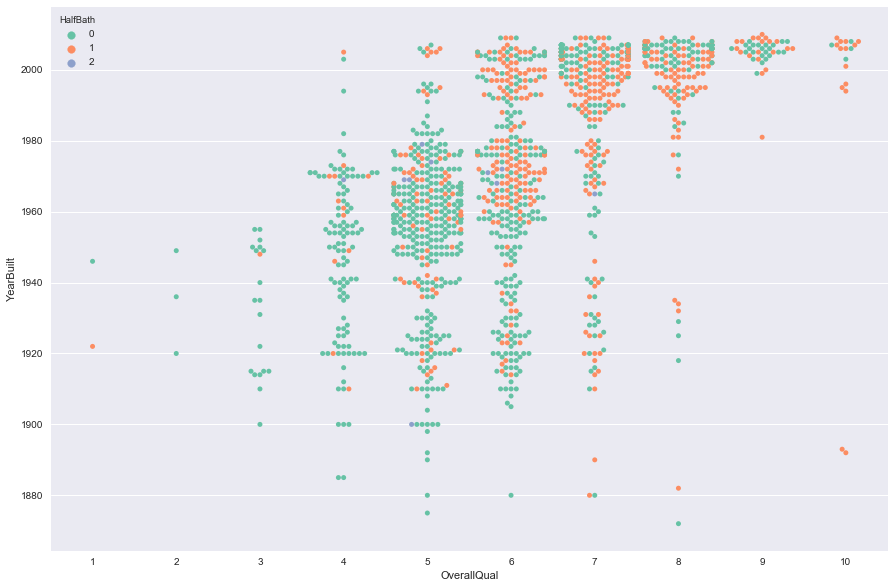

In [320]:
ax = plt.subplots(figsize=(15, 10))
ax =sns.swarmplot(y="YearBuilt",x = "OverallQual", hue="HalfBath", data=train, palette="Set2")

In [ ]:
Key Findings : 
    
    Regarding the individual attributes of the dataset: 
        